# Used Car Price Prediction and Analysis

## Overview

In this project, we will be analyzing a dataset containing information on used cars. The dataset, sourced from Kaggle, originally contained details for 3 million cars. However, for the sake of efficiency and computational speed, we are working with a reduced dataset containing information on 426,000 cars. Our goal is to analyze what factors influence the price of a used car and provide actionable recommendations to a used car dealership on what consumers value when purchasing a car.

### Objective

- **Goal**: Understand the factors that influence the price of a used car.
- **Target Audience**: A used car dealership looking to improve their pricing and sales strategy.
- **Outcome**: Provide clear recommendations on the factors that consumers value most in a used car.

### Approach

We will frame this analysis using the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) framework. This widely used process in data mining and machine learning ensures a structured and efficient approach to solving data problems. Below are the phases we will follow throughout this notebook:

---

## CRISP-DM Framework

**1. Business Understanding**
   - **Objective**: Our client, a used car dealership, wants to understand what factors influence the pricing of used cars. 
   - **Outcome**: Our analysis will help identify these factors and provide actionable insights for pricing optimization.

**2. Data Understanding**
   - **Dataset Overview**: 
     - The dataset contains various features such as the make, model, year of manufacture, mileage, fuel type, and condition of the car.
     - We will start by loading and exploring the dataset to understand its structure, quality, and contents.
   - **Initial Questions**:
     - What are the key features of a car that impact its price?
     - Are there any missing or outlier values that need to be addressed?
  
**3. Data Preparation**
   - **Data Cleaning**: We will preprocess the dataset by handling missing values, outliers, and data inconsistencies.
   - **Feature Engineering**: We will create new features where necessary and prepare the data for model building.

**4. Modeling**
   - **Model Selection**: Using various regression models (like RandomForestRegressor), we will train a model to predict the car price based on its features.
   - **Hyperparameter Tuning**: We will optimize the model using techniques like `RandomizedSearchCV` to find the best parameters for better accuracy.

**5. Evaluation**
   - **Model Evaluation**: We will evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) to assess how well the model predicts the car prices.
  
**6. Deployment**
   - **Recommendations**: Based on the analysis, we will provide actionable recommendations to the dealership on which car attributes are most significant when determining the price.
  
---

## Next Steps

In this notebook, we will start by loading the data and exploring its key features to understand the scope and nature of the dataset. We will then move on to preprocessing, modeling, and evaluating our predictive models.

Let's begin by importing the necessary libraries and loading the dataset.



In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import scipy as sp

# Plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Sklearn - Machine Learning Models and Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    PolynomialFeatures, StandardScaler, LabelEncoder
)
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, cross_val_score, RandomizedSearchCV
)
from sklearn.linear_model import (
    LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
)
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import (
    GradientBoostingRegressor, RandomForestRegressor
)
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, 
    mean_squared_log_error, mean_absolute_percentage_error, r2_score
)
from sklearn.datasets import make_regression

# XGBoost
import xgboost as xgb

# Miscellaneous
import io


**1. Read in the vehicles.csv file.**

In [4]:
# Read in the dataset and handle potential errors
car_raw = pd.read_csv('data/vehicles.csv')
    
# Display the shape of the DataFrame
print(f"Shape of used car DataFrame: {car_raw.shape}")


Shape of used car DataFrame: (426880, 18)


**2. Generating descriptive statistics**

In [6]:
# Set display option for floating-point numbers to show two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
car_raw.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880.00,426880,426880.00,425675.00,409234,421603,252776,249202,423867,422480.00,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7311486634.22,NaN,75199.03,2011.24,NaN,NaN,NaN,NaN,NaN,98043.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4473170.41,NaN,12182282.17,9.45,NaN,NaN,NaN,NaN,NaN,213881.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7207408119.00,NaN,0.00,1900.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7308143339.25,NaN,5900.00,2008.00,NaN,NaN,NaN,NaN,NaN,37704.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7312620821.00,NaN,13950.00,2013.00,NaN,NaN,NaN,NaN,NaN,85548.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7315253543.50,NaN,26485.75,2017.00,NaN,NaN,NaN,NaN,NaN,133542.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Understanding

In this section, we perform an initial exploration of the dataset to understand its structure, quality, and basic statistics. This will allow us to identify any potential issues and provide insights that guide further data preparation and modeling.

### Dataset Overview

The dataset contains **426,880 rows** with multiple attributes related to used cars, including information on price, year, manufacturer, model, condition, and more.

### Key Takeaways from Descriptive Statistics:

1. **General Overview**:
   - **Shape of the DataFrame**: The dataset consists of **426,880 rows** and contains columns that represent various car attributes.
   
2. **Column Insights**:
   - **`region`**: There are **404 unique regions**, with **"Columbus"** being the most common (3,608 occurrences).
   - **`price`**: Prices range from **$0** to **$3,736,928,711**. The mean price is **$75,199**, but the maximum price is unusually high, suggesting possible outliers or errors in the dataset.
   - **`year`**: Car manufacturing years range from **1900** to **2022**, with most cars manufactured after **2010** (mean year: **2011**).
   - **`manufacturer`**: There are **42 unique manufacturers**, with **Ford** being the most frequent manufacturer (7,985 occurrences).
   - **`model`**: The dataset contains a wide variety of models, with **"F-150"** being the most frequent (12,146 occurrences).
   - **`condition`**: The cars are categorized into **6 different conditions**, with **"Good"** being the most common (121,456 occurrences).
   - **`cylinders`**: The majority of vehicles have **6 cylinders** (94,169 occurrences), followed by other options like **4 cylinders** and **8 cylinders**.
   - **`fuel`**: The fuel types include **gas**, **diesel**, **electric**, etc., with **gas** being the most common.
   - **`odometer`**: The mileage ranges from **0 miles** to **10,000,000 miles**, with a mean of **98,043 miles**.
   - **`title_status`**: A majority of the cars have a **clean** title status (405,117 occurrences).
   - **`transmission`**: The most common transmission type is **automatic** (336,524 occurrences).
   - **`VIN`**: There are **118,246 unique VINs**, indicating multiple cars across different manufacturers.
   - **`drive`**: The most frequent drive type is **4wd** (131,904 occurrences).
   - **`size`**: The car sizes include options like **full-size** and **compact**, with **full-size** being the most frequent (63,465 occurrences).
   - **`type`**: The most common car type is **sedan** (87,056 occurrences).
   - **`paint_color`**: The most frequent color is **white** (79,285 occurrences).
   - **`state`**: The dataset spans **51 states**, with **California** being the most common state (50,614 occurrences).

3. **Statistical Summary**:
   - **Price**:
     - Min: **$0** (likely a placeholder or missing data)
     - 25th percentile: **$5,900**
     - Median (50th percentile): **$13,950**
     - 75th percentile: **$26,485**
     - Max: **$3,736,928,711** (this is an outlier or error)
   - **Odometer**:
     - Min: **0 miles**
     - Max: **10,000,000 miles** (potential outliers)
   - **Year**:
     - Most cars are from the **2010s**, with a median year of **2013**.

4. **Potential Data Issues**:
   - **Outliers**: Extreme values in the `price` and `odometer` columns suggest the presence of outliers, which may need to be addressed (e.g., by removal or transformation).
   - **Missing Data**: Some columns have missing values, such as `year`, `manufacturer`, `model`, and `odometer`, which will need to be handled during data preprocessing.

5. **Next Steps**:
   - **Data Cleaning**: Handle missing values, remove or adjust outliers, and encode categorical features.
   - **Feature Engineering**: Consider transforming or creating new features to improve model performance.
   - **Data Exploration**: Further analyze the relationships between features and the target variable (price).

---


**3. Data Cleaning: Dropping Unnecessary Columns**

**Dropping Unnecessary Columns**

### Reason for Dropping Columns:

1. **`id` and `VIN`**: 
   - These columns represent unique identifiers for each car but do not contain meaningful information that can be used to predict price or other car characteristics. Dropping them avoids unnecessary noise in the dataset.

2. **`region` and `state`**: 
   - Although `region` and `state` might be useful for some analyses (e.g., regional price differences), they are not critical for building predictive models in this context, especially if you don’t intend to use them as features or if they have too many unique values. 
   - These columns could also lead to overfitting in some cases, so removing them simplifies the dataset.

3. **`model`**: 
   - While `model` is a useful feature in real-world scenarios, it can sometimes have too many unique categories, making it difficult to encode effectively. 
   - Depending on the analysis you want to do, you may want to drop it for now and revisit it later if it proves important.

4. **`size`, `paint_color`, and `drive`**:
   - These columns may not add significant value to predicting car prices in this context. For instance:
     - **`size`**: Cars can be categorized into different sizes (e.g., full-size, compact), but for a price prediction model, this might not contribute much or could be highly correlated with other features.
     - **`paint_color`**: The color of a car, while important to some buyers, may not have a strong impact on price, depending on the market.
     - **`drive`**: This could be a proxy for the type of vehicle (e.g., 4wd vs. front-wheel drive), but it might not be as crucial for predicting price in this dataset. You could always revisit this feature after further exploration.

### Benefits of Dropping These Columns:

- **Reduced Dimensionality**: Dropping unnecessary columns reduces the number of features, which can improve the performance of machine learning algorithms (especially in high-dimensional datasets).
- **Simplified Model**: By removing irrelevant or redundant information, we ensure that the model focuses on more meaningful features, making it easier to interpret and improving model accuracy.


In [10]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['id', 'VIN', 'region', 'model', 'state', 'size', 'paint_color', 'drive']
car_raw.drop(columns=columns_to_drop, axis=1, inplace=True)

# Set display option for floating-point numbers to show two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Generate descriptive statistics for the remaining columns
car_raw.describe(include='all')


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type
count,426880.00,425675.00,409234,252776,249202,423867,422480.00,418638,424324,334022
unique,NaN,NaN,42,6,8,5,NaN,6,3,13
top,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,sedan
freq,NaN,NaN,70985,121456,94169,356209,NaN,405117,336524,87056
mean,75199.03,2011.24,NaN,NaN,NaN,NaN,98043.33,NaN,NaN,NaN
std,12182282.17,9.45,NaN,NaN,NaN,NaN,213881.50,NaN,NaN,NaN
min,0.00,1900.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
25%,5900.00,2008.00,NaN,NaN,NaN,NaN,37704.00,NaN,NaN,NaN
50%,13950.00,2013.00,NaN,NaN,NaN,NaN,85548.00,NaN,NaN,NaN
75%,26485.75,2017.00,NaN,NaN,NaN,NaN,133542.50,NaN,NaN,NaN


**4. Data Cleaning: Check for rows with missing (null) or empty values in any of the specified columns**

In [12]:
# Check for rows with missing (null) or empty values in any of the specified columns
columns_to_check = ['price', 'year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'cylinders', 'condition']

# Check if any of these columns have null values in each row
rows_with_null_values = car_raw[columns_to_check].isnull().any(axis=1)

# Count how many rows have missing values in any of these columns
num_rows_with_null_values = rows_with_null_values.sum()

print(f"Number of rows with missing or empty values in any of the specified columns: {num_rows_with_null_values}")


Number of rows with missing or empty values in any of the specified columns: 278498


**4. Data Cleaning: Drop rows that have missing values in any of the specified columns**

*Effect of Dropping Rows:* This step ensures that you remove any rows that could negatively impact model accuracy or introduce bias due to missing data in critical columns.

In [14]:
# Drop rows that have missing values in any of the specified columns
columns_to_check = ['price', 'year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'cylinders', 'condition']

# Drop rows where any of these columns have missing values
car_raw = car_raw.dropna(subset=columns_to_check, how='any')

# Verify if there are any missing values left
print(f"Number of rows after dropping missing values: {car_raw.shape[0]}")


Number of rows after dropping missing values: 148382


**5. Data Cleaning: Remove duplicate rows**

*Effect of Dropping Duplicates:* 
This step ensures that any duplicate rows are removed from the dataset. Duplicate rows can arise due to data entry errors or redundant records, which can negatively affect the model's performance by giving more weight to those repeated instances. Removing duplicates ensures that each data point is unique and prevents bias from artificially inflating the sample size.

After removing duplicates, the dataset will be cleaner and more representative of the unique observations, ensuring a more accurate and unbiased model.

*Verification:* 
After removing duplicates, we check whether any missing values remain in the dataset by using `isnull().sum()`. This helps us ensure that no additional issues have been introduced by the removal process.


In [16]:
# Remove duplicate rows
car_raw = car_raw.drop_duplicates()

# Verify removal of duplicates
print("After removing duplicates:")
print(car_raw.isnull().sum())  # Check if there are any missing values

After removing duplicates:
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
dtype: int64


**6. Feature Engineering: Create a new feature – `car_age`**

*Effect of Creating New Feature:*
This step adds a new feature, `car_age`, which represents the age of the car. By subtracting the `year` of the car from the current year (2023), we derive a simple yet informative feature that can help improve model performance. The age of the car is an important factor in determining its price, condition, and overall value, as older cars typically have lower prices and may have more wear and tear.

The new feature `car_age` provides a clear insight into the car's age, making it more intuitive for the model to understand and use for predictions.

*Verification:*
The new `car_age` feature is added directly to the dataset, and it will be used for further analysis and model training. You can verify this by inspecting the first few rows of the dataset after the transformation.


In [18]:
car_raw['car_age'] = 2023 - car_raw['year']

**7. Data Cleaning: Remove Outliers Using the IQR Method**

*Effect of Removing Outliers:*
This step aims to remove extreme values (outliers) from the dataset that may distort statistical analyses or model performance. Outliers can occur for various reasons, such as errors in data entry or unusual observations, and they can have a disproportionate impact on the model if not handled properly. The Interquartile Range (IQR) method is used to identify and remove these outliers.

- **IQR Method**: 
  - The IQR method calculates the **first (Q1)** and **third quartiles (Q3)**, and then defines the **interquartile range (IQR)** as the difference between Q3 and Q1. Any values outside of the range defined by `(Q1 - 1.5 * IQR)` to `(Q3 + 1.5 * IQR)` are considered outliers and are removed.
  - A **multiplier** of 1.5 is commonly used, but it can be adjusted depending on how aggressive you want to be in removing outliers.

*Verification:*
After the outliers are removed from the `price`, `odometer`, and `year` columns, the data is cleaned and ready for analysis. You can verify this by checking the summary statistics (`describe()`) or visualizing the data (e.g., with boxplots) to confirm that outliers have been handled.



In [20]:
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.32)
    Q3 = df[column].quantile(0.68)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Removing outliers from the 'price' column
car_raw = remove_outliers_iqr(car_raw, 'price')
car_raw = remove_outliers_iqr(car_raw, 'odometer')
car_raw = remove_outliers_iqr(car_raw, 'year')
 
 

**8. Data Exploration: Exploring the Probability Distribution**

*Effect of Exploring Probability Distribution:*
This step provides an overview of the dataset's statistical properties and distributions, allowing us to understand the central tendencies (mean, median), spread (standard deviation, range), and potential outliers. The `describe()` function in Pandas summarizes the key statistics of numerical columns, while `include='all'` also includes categorical features to provide a comprehensive overview of the dataset.

- **Descriptive Statistics**: 
  The `describe()` function generates statistics like:
  - **Count**: Number of non-null entries.
  - **Mean**: Average value.
  - **Std**: Standard deviation.
  - **Min/Max**: The range of values.
  - **25%, 50%, 75%**: The quartiles, which help us understand the distribution of values.
  
- **Importance of This Step**:
  - **Understanding the Data Distribution**: This helps in detecting skewness, identifying outliers, and understanding the spread of the data, which is essential for choosing the right model and preprocessing techniques.
  - **Identifying Potential Issues**: Knowing the summary statistics helps to check for inconsistencies, missing data, or other problems that need attention.

*Verification:*
After executing this step, you can visually inspect the distribution of features using plots (such as histograms or boxplots) or proceed with further exploration based on the summary statistics provided.


In [22]:
#Exploring probability distribution 

pd.set_option('display.float_format', '{:.2f}'.format)
car_raw.describe(include='all')

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type,car_age
count,71599.00,71599.00,71599,71599,71599,71599,71599.00,71599,71599,71599,71599.00
unique,NaN,NaN,39,6,8,5,NaN,6,3,13,NaN
top,NaN,NaN,ford,excellent,4 cylinders,gas,NaN,clean,automatic,sedan,NaN
freq,NaN,NaN,10868,36287,28821,68051,NaN,66871,65610,24466,NaN
mean,9548.91,2009.73,NaN,NaN,NaN,NaN,120156.82,NaN,NaN,NaN,13.27
std,6265.96,5.08,NaN,NaN,NaN,NaN,49355.66,NaN,NaN,NaN,5.08
min,0.00,1997.00,NaN,NaN,NaN,NaN,11559.00,NaN,NaN,NaN,2.00
25%,4900.00,2006.00,NaN,NaN,NaN,NaN,85000.00,NaN,NaN,NaN,9.00
50%,8000.00,2010.00,NaN,NaN,NaN,NaN,119822.00,NaN,NaN,NaN,13.00
75%,13595.00,2014.00,NaN,NaN,NaN,NaN,155500.00,NaN,NaN,NaN,17.00


**9. Feature Transformation: Apply Log Transformation to `price`**

*Effect of Log Transformation:*
This step applies a **logarithmic transformation** to the `price` column to address potential **skewness** in the data and make the distribution more **normal**. Many real-world datasets, including prices, tend to have a **right-skewed** distribution, where a few high-priced outliers dominate the data. Log transformation can help:
- **Reduce skewness** by compressing the higher values, making the data distribution more symmetric and normal.
- **Stabilize variance** by mitigating the impact of extreme values, which might otherwise disproportionately affect model performance.

The `np.log1p()` function is used instead of `np.log()` to handle the special case where `price = 0` by applying the transformation `log(x + 1)` instead of `log(x)`. This ensures that zero values don't cause errors or undefined results.

*Verification:*
A histogram with a Kernel Density Estimate (KDE) is plotted to visually inspect the distribution of the **log-transformed price**. This helps assess how the transformation has affected the distribution and whether it now appears more normally distributed.



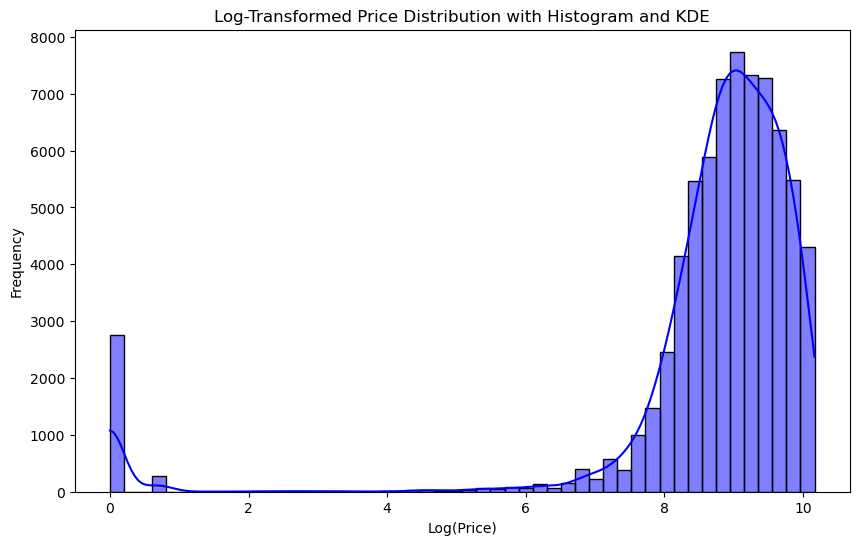

In [24]:
# Apply a log transformation to the price column
car_raw['log_price'] = np.log1p(car_raw['price'])  # log1p is log(x + 1) to handle zero values

plt.figure(figsize=(10, 6))
sns.histplot(car_raw['log_price'], bins=50, kde=True, color='blue')
plt.title('Log-Transformed Price Distribution with Histogram and KDE')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

**12. Data Exploration: Distribution of Numerical Variables**

*Effect of Visualizing Distributions:*
This step visualizes the distribution of key numerical variables using **displots**, which combine histograms and Kernel Density Estimates (KDE). Visualizing the distribution of numerical features is essential to understand their spread, detect skewness, and identify potential outliers or patterns. It also helps assess the suitability of the data for specific modeling techniques that may assume normality.

**1. Displot for `Price`**
   - A **displot** is created to visualize the distribution of `price` with a histogram and KDE overlay. This helps us understand the overall price distribution and detect any skewness or outliers.

**2. Displot for `Year`**
   - A similar **displot** is plotted for the `year` column. This allows us to see the range of car years in the dataset and understand if the dataset is biased toward newer or older cars.

**3. Displot for `Odometer`**
   - The **displot** for `odometer` visualizes the distribution of the car's mileage. This can help us assess whether cars with higher mileage are underrepresented or if the distribution is skewed.

---

*Verification:*
By visualizing the distributions of the key numerical features, we can detect whether any features are heavily skewed or contain outliers, which may need to be addressed before building a predictive model.


<Figure size 1000x600 with 0 Axes>

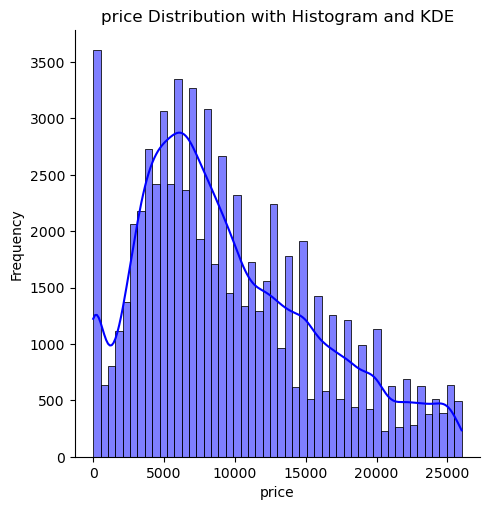

<Figure size 1000x600 with 0 Axes>

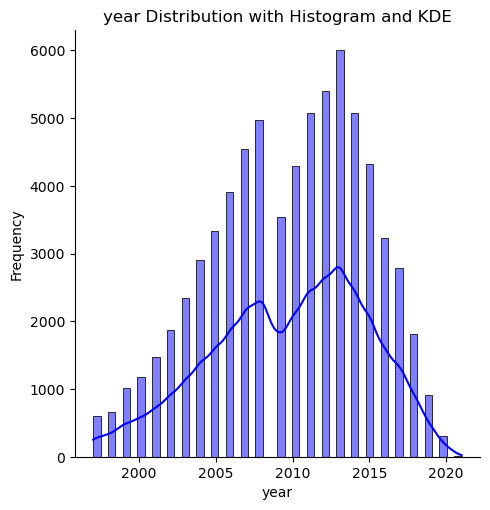

<Figure size 1000x600 with 0 Axes>

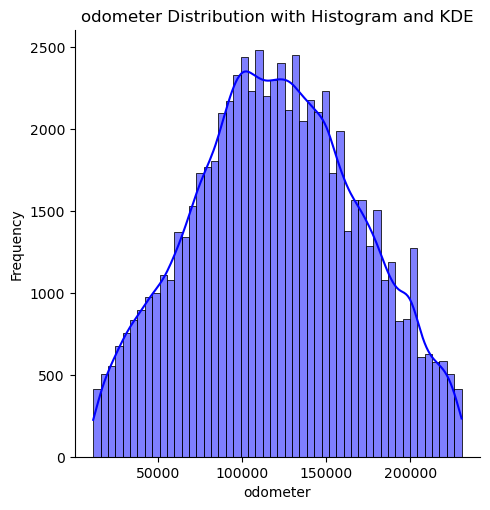

In [26]:
# List of numerical columns to visualize
numerical_columns = ['price', 'year', 'odometer']  # You can add more columns as needed

# Create a displot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.displot(car_raw[col], kde=True, bins=50, color='blue')
    plt.title(f'{col} Distribution with Histogram and KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**13. Data Cleaning: Create Cleand Data frame and Reset Index**

*Effect of Resetting Index:*
This step resets the index of the `car_raw` DataFrame after dropping rows (e.g., due to outliers or missing data). When rows are removed, the index values can become non-sequential, which may not be ideal for further processing or modeling tasks. By resetting the index, we ensure that the index is sequential and starts from `0`, making the dataset more consistent and easier to work with.

- **`reset_index(drop=True)`**:
  - The `drop=True` argument ensures that the old index is **not added as a new column** to the DataFrame. If this argument was omitted, the old index would be preserved as a column.
  - This method returns a new DataFrame with the index reset, leaving the original data unchanged.

*Verification:*
After resetting the index, the `car_cleaned_data` DataFrame now has a clean, sequential index. This can be verified by inspecting the first few rows of the cleaned dataset to confirm that the index is reset properly.



In [28]:
car_cleaned_data = car_raw.reset_index(drop=True)
car_cleaned_data

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type,car_age,log_price
0,22590,2010.00,chevrolet,good,8 cylinders,gas,71229.00,clean,other,pickup,13.00,10.03
1,15000,2013.00,ford,excellent,6 cylinders,gas,128000.00,clean,automatic,truck,10.00,9.62
2,24590,2017.00,chevrolet,good,6 cylinders,gas,40784.00,clean,other,pickup,6.00,10.11
3,22590,2017.00,ram,good,8 cylinders,gas,39508.00,clean,other,pickup,6.00,10.03
4,19900,2004.00,ford,good,8 cylinders,diesel,88000.00,clean,automatic,pickup,19.00,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
71594,800,2000.00,cadillac,excellent,8 cylinders,gas,100000.00,clean,automatic,coupe,23.00,6.69
71595,17950,2004.00,ford,excellent,8 cylinders,diesel,186000.00,clean,automatic,other,19.00,9.80
71596,6250,2006.00,chevrolet,good,8 cylinders,gas,200000.00,clean,automatic,truck,17.00,8.74
71597,18000,2005.00,chevrolet,excellent,8 cylinders,gas,130000.00,lien,automatic,truck,18.00,9.80


**14.Data Exploration: Visualizing Relationships and Correlations** 

**Effect of Visualizing Relationships and Correlations:**

This step aims to explore the relationships between the **log-transformed price** and various features, such as `year`, `odometer`, `manufacturer`, and `condition`, as well as the correlations between numerical features in the dataset. These visualizations help us identify trends, correlations, and potential patterns in the data that can be leveraged when building predictive models.

**1. Scatter Plot for `Year` vs. Log(Price):**
   - The scatter plot shows how car prices (in log scale) are related to the car's `year`. This helps to identify if newer cars are generally priced higher or if there's any specific trend over time.

**2. Scatter Plot for `Odometer` vs. Log(Price):**
   - This scatter plot visualizes the relationship between the `odometer` reading (mileage) and `log(Price)`. It can help us understand if cars with higher mileage tend to have lower prices, which is often expected.

**3. Box Plot for `Manufacturer` vs. Log(Price):**
   - A box plot helps us see the distribution of log-transformed prices by different manufacturers. It identifies how car prices vary by brand and helps pinpoint any brands with unusually high or low prices.

**4. Box Plot for `Condition` vs. Log(Price):**
   - This plot shows the relationship between the car's `condition` (e.g., new, good, damaged) and its log-transformed price. We can check if certain conditions are associated with higher prices.

**5. Correlation Heatmap for All Numerical Variables:**
   - A heatmap visualizes the correlation matrix for all numerical columns, allowing us to quickly identify which features are strongly correlated with each other. For example, `year` might be strongly correlated with `price`, and `odometer` could have an inverse relationship with `price`.

**6. Additional Scatter Plots for Log(Price) vs. Numerical Variables:**
   - Scatter plots for `Log(Price)` against `year` and `odometer` are also provided to confirm trends, where we would expect `odometer` to negatively correlate with `price` and `year` to positively correlate with `price`.

**7. Distribution of Log(Price):**
   - The histogram with a KDE overlay provides an understanding of the distribution of log-transformed prices, showing us whether the distribution is roughly normal or skewed.

**8. Count Plot for `Condition` Distribution:**
   - A count plot is used to visualize the frequency distribution of the `condition` feature, providing insights into how many cars fall into each condition category.

**9. Pairplot for Numerical Features:**
   - This pairplot visually explores the relationships between the numerical features (`price`, `year`, `odometer`, etc.) to detect any patterns or correlations that can inform future analyses or modeling.

---

**Verification:**
These visualizations help explore the relationships and distributions of features and their interactions with `log_price`. Understanding these relationships is crucial for identifying which features are most relevant to predicting car prices and which may need further preprocessing (e.g., transformations, encoding, or handling missing values).


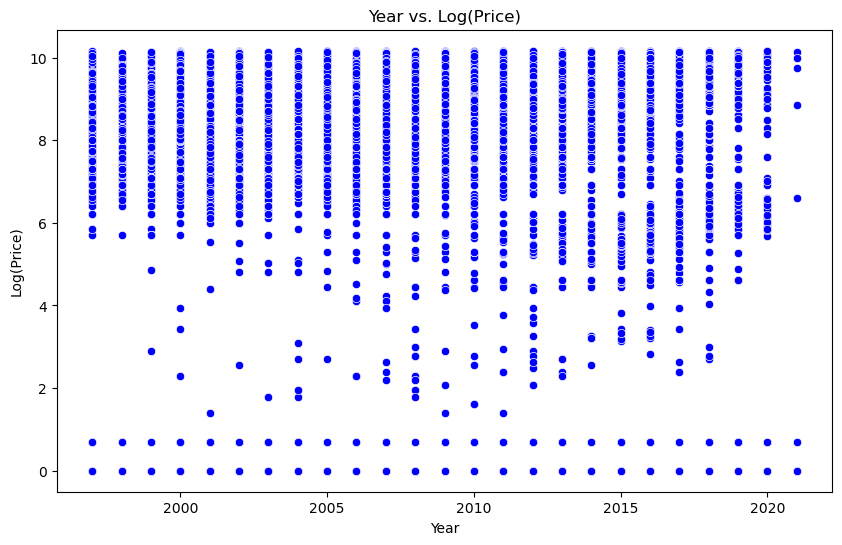

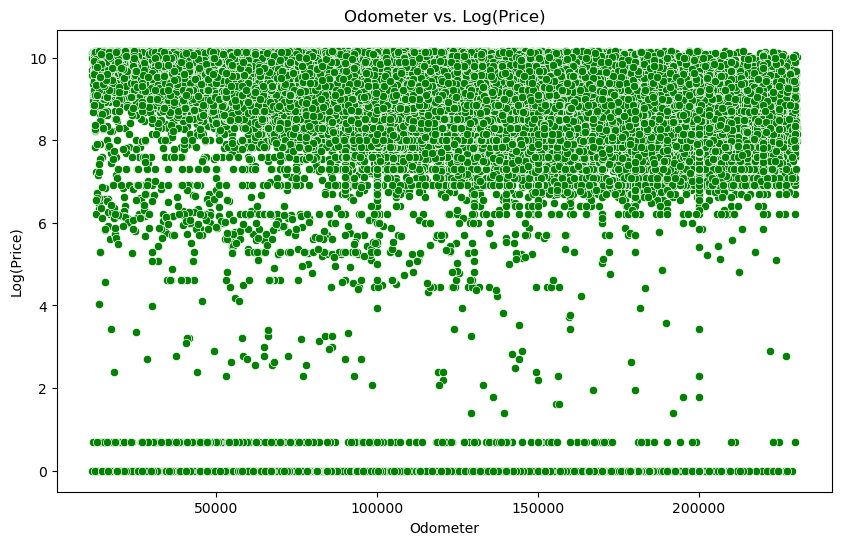

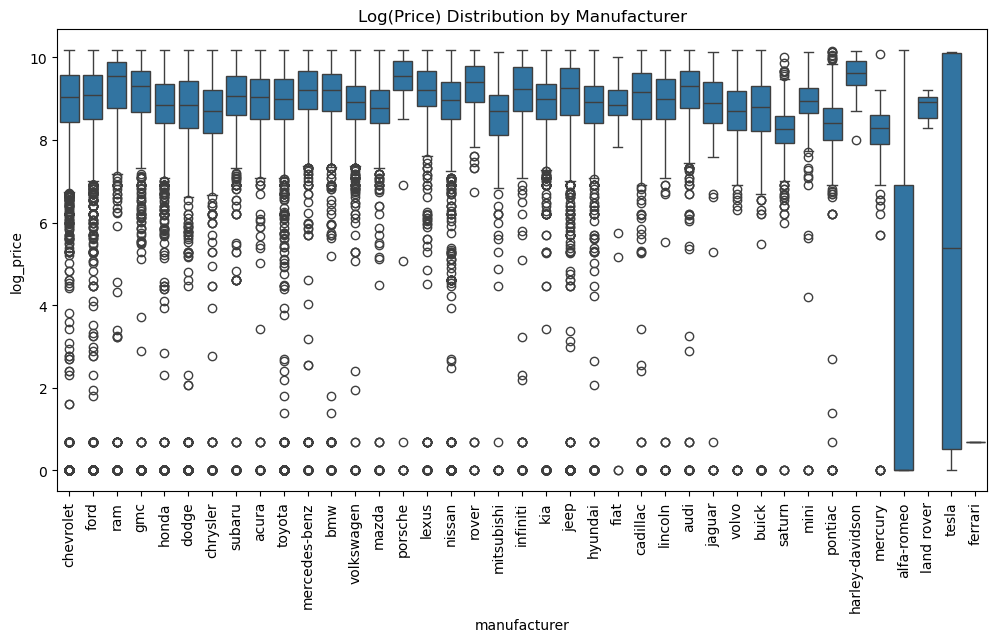

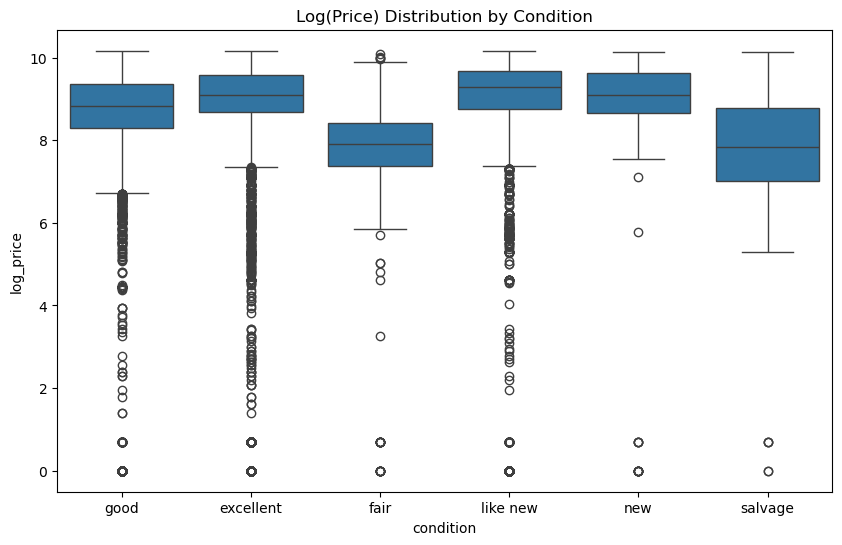

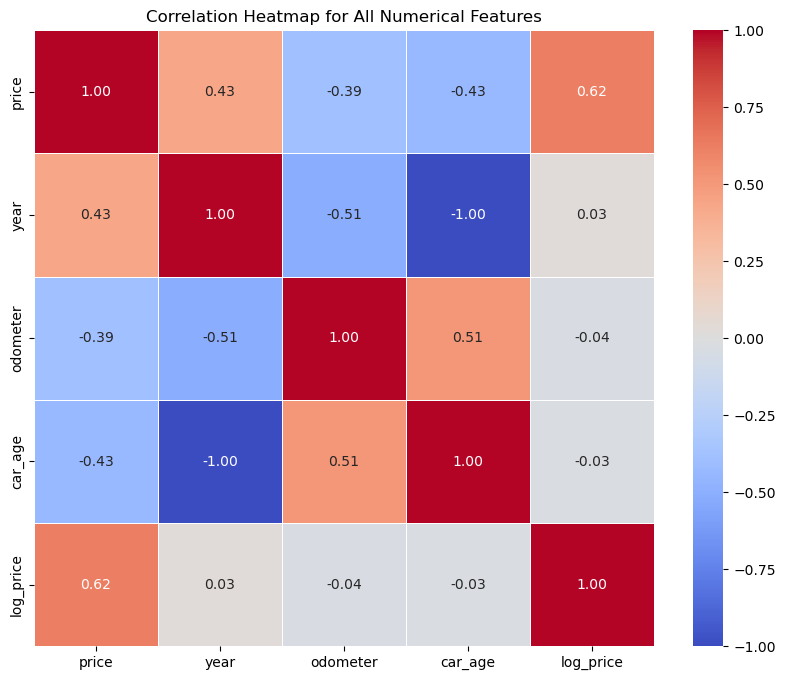

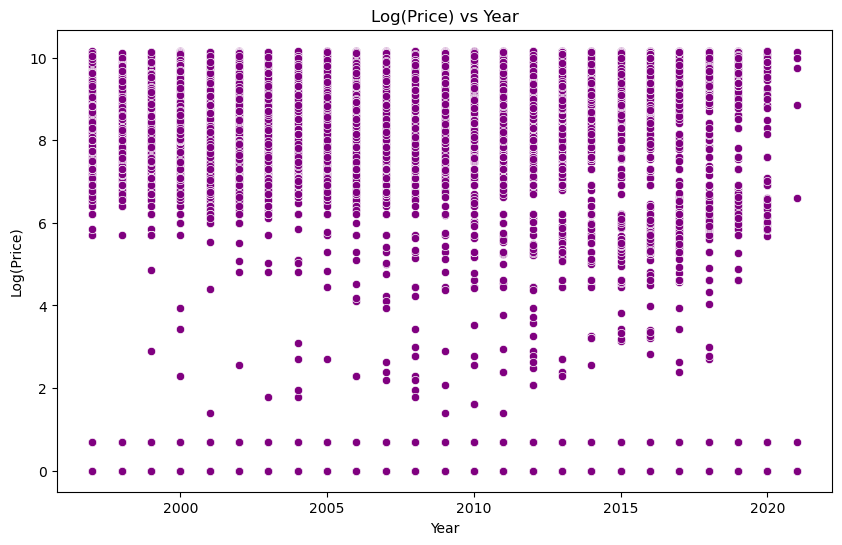

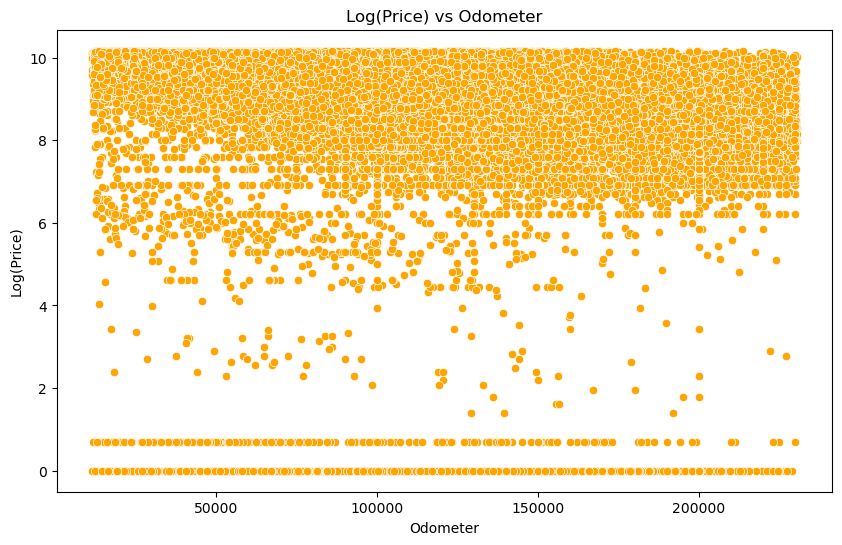

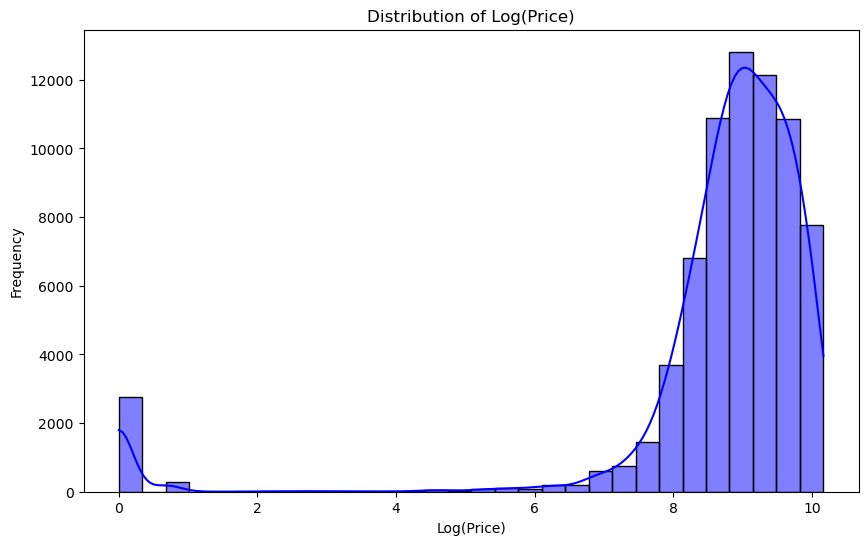

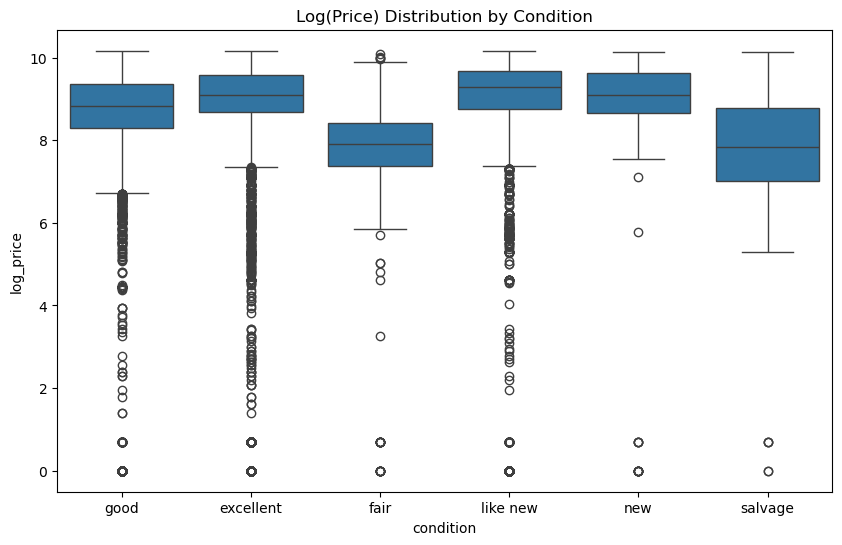

C:\Users\612172\AppData\Local\Temp\2\ipykernel_7944\3874194826.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=car_cleaned_data, palette='Set2')


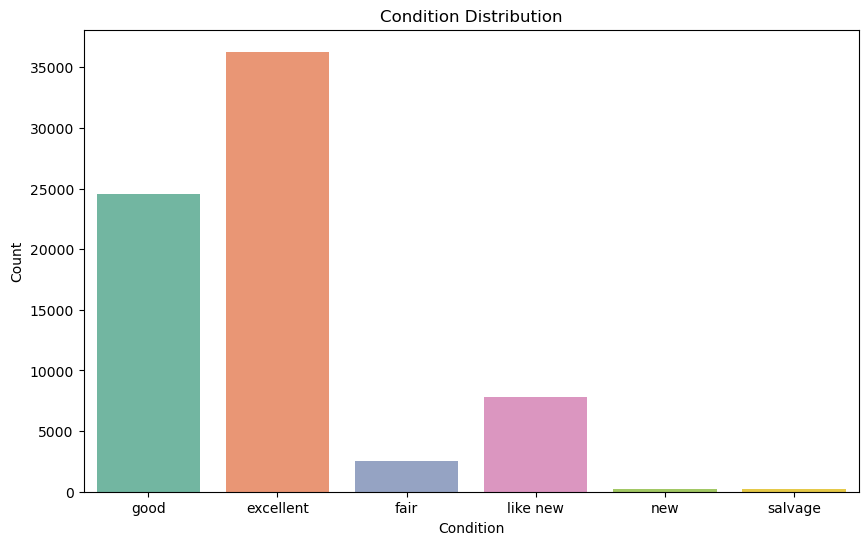

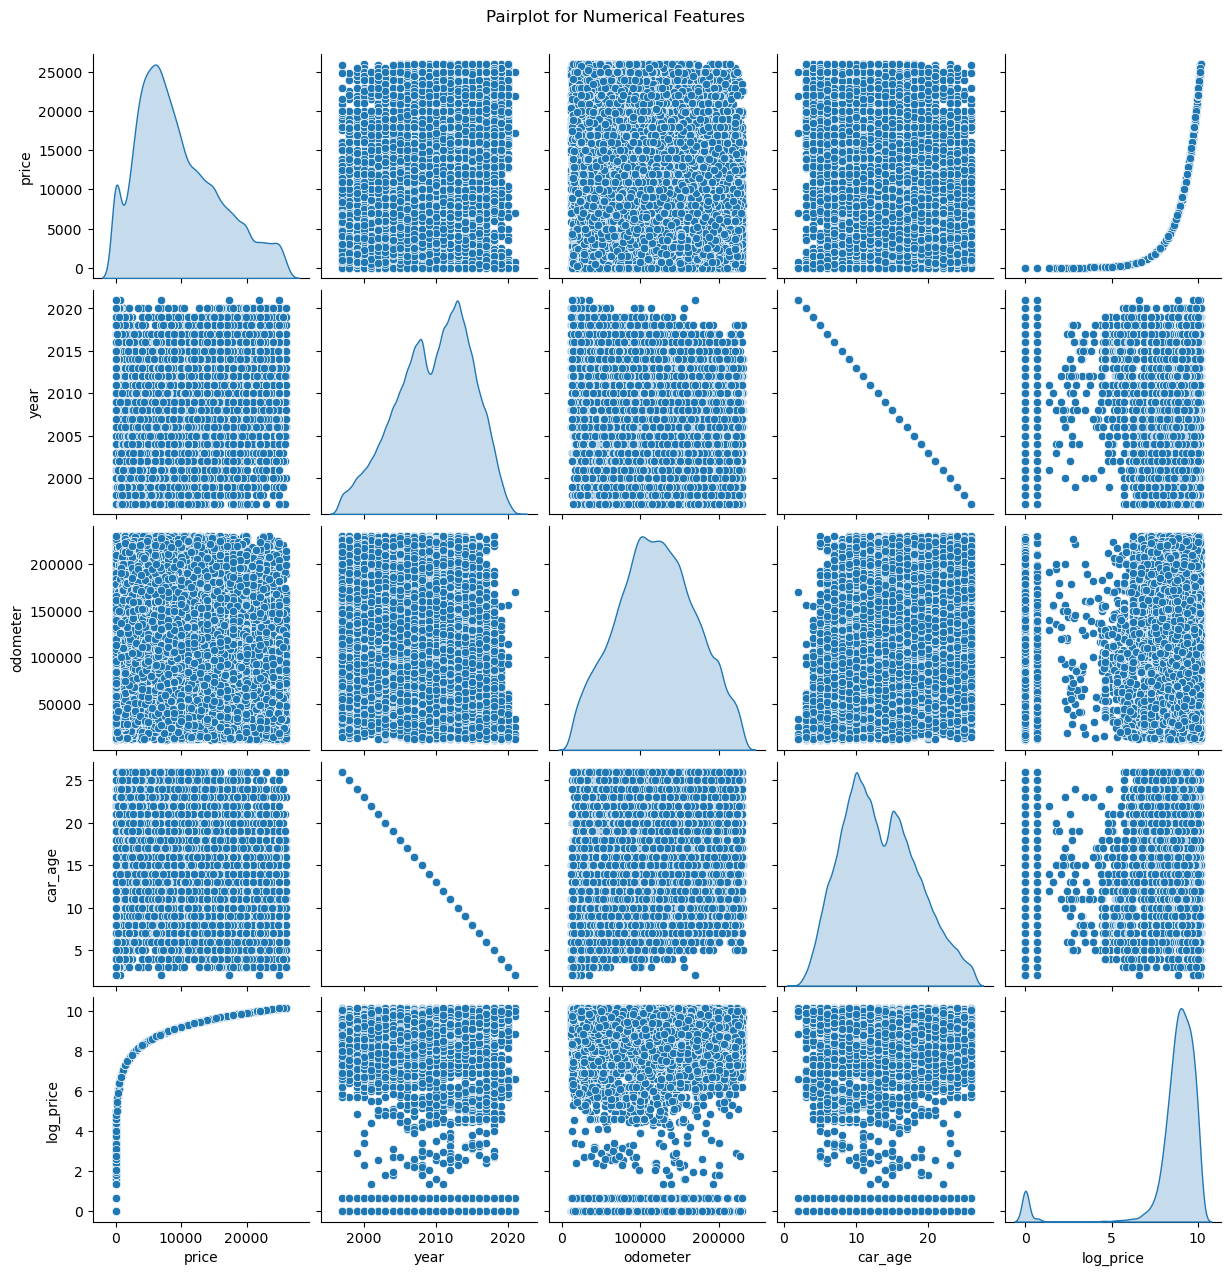

In [30]:
# --- Scatter plot for Year vs Log(Price) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='log_price', data=car_cleaned_data, color='blue')
plt.title('Year vs. Log(Price)')
plt.xlabel('Year')
plt.ylabel('Log(Price)')
plt.show()

# --- Scatter plot for Odometer vs Log(Price) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='log_price', data=car_cleaned_data, color='green')
plt.title('Odometer vs. Log(Price)')
plt.xlabel('Odometer')
plt.ylabel('Log(Price)')
plt.show()

# --- Box plot for Manufacturer vs Log(Price) ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='log_price', data=car_cleaned_data)
plt.title('Log(Price) Distribution by Manufacturer')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# --- Box plot for Condition vs Log(Price) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='log_price', data=car_cleaned_data)
plt.title('Log(Price) Distribution by Condition')
plt.show()

# --- Calculate correlation matrix for only numerical variables ---
numerical_cols = car_cleaned_data.select_dtypes(include=['number']).columns
corr_matrix_all = car_cleaned_data[numerical_cols].corr()

# --- Plot correlation heatmap for all numerical variables ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for All Numerical Features')
plt.show()

# --- Additional Scatter Plots for Log(Price) vs Numerical Variables ---
# Scatter plot for Log(Price) vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='log_price', data=car_cleaned_data, color='purple')
plt.title('Log(Price) vs Year')
plt.xlabel('Year')
plt.ylabel('Log(Price)')
plt.show()

# Scatter plot for Log(Price) vs Odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='log_price', data=car_cleaned_data, color='orange')
plt.title('Log(Price) vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Log(Price)')
plt.show()

# --- Distribution of Log(Price) ---
plt.figure(figsize=(10, 6))
sns.histplot(car_cleaned_data['log_price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

# --- Box plot for Condition vs Log(Price) (Additional) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='log_price', data=car_cleaned_data)
plt.title('Log(Price) Distribution by Condition')
plt.show()

# --- Count plot for Condition Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=car_cleaned_data, palette='Set2')
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# --- Pairplot for Numerical Features ---
sns.pairplot(car_cleaned_data[numerical_cols], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()


**15. Verifying Data Types**

In this step, we initialize the `LabelEncoder` from the `sklearn.preprocessing` library. While this step prepares the encoding functionality, the focus here is on confirming that the relevant columns in the cleaned data are of the correct numeric type (i.e., `int` or `float`).

We are specifically checking the data types for the columns `log_price`, `year`, and `odometer` to ensure that they are in numeric format and ready for modeling.

**Key Insight:**
- **Data Type Check**: Before moving forward with any encoding or model training, it's essential to verify that columns meant for mathematical operations (like regression or classification models) are in the correct format. If any of these columns are in an incorrect format (e.g., categorical or object type), it could cause issues in subsequent analysis or model training.




In [32]:
# Initialize LabelEncoder
le = LabelEncoder() 
print(car_cleaned_data[['log_price', 'year', 'odometer']].dtypes)


log_price    float64
year         float64
odometer     float64
dtype: object


**16. Analyzing Correlations Between Key Variables**

**Effect of Correlation Analysis:**

In this step, we are calculating the correlation matrix between key numerical features (`log_price`, `year`, `odometer`) to understand their linear relationships. The correlation matrix shows how strongly pairs of variables are related, with values ranging from -1 to 1:
- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no linear relationship.

The heatmap provides a visual representation of these relationships, helping us identify which variables are closely related to the target variable (`log_price`) and which ones are less influential.

**Key Insight:**
- Understanding the correlation between numerical features can guide model feature selection. For instance, if two features are highly correlated, one of them might be redundant and could be removed to prevent multicollinearity in machine learning models.


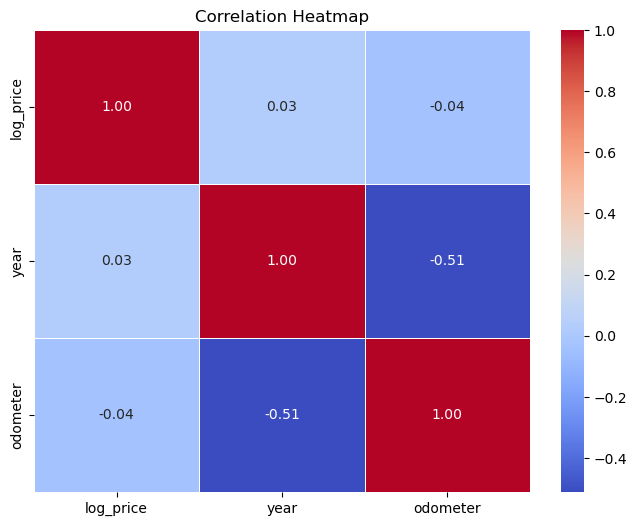

In [34]:
# Compute the correlation matrix for selected columns
corr_matrix = car_cleaned_data[['log_price', 'year', 'odometer']].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**17. Checking for Multicollinearity: Variance Inflation Factor (VIF)**

**Effect of Checking Multicollinearity:**

The Variance Inflation Factor (VIF) is a measure that quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. It checks for correlations between the features in the dataset. The higher the VIF, the more correlated a feature is with other features, which can lead to instability in regression models.

**VIF Interpretation:**
- **VIF = 1**: No multicollinearity.
- **1 < VIF ≤ 5**: Moderate multicollinearity.
- **VIF > 5**: High multicollinearity, suggesting that the feature is highly correlated with other features and may need to be removed or combined with others.

This step is important to ensure that the selected features in the model do not lead to multicollinearity, which can affect the model's coefficients and predictions.


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the features you want to check for multicollinearity
var = car_cleaned_data[[ 'year', 'odometer' ]]  # You can add more features as needed

# Add a constant column for the intercept term
 
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = var.columns
vif_data["VIF"] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]

# Display the VIF values
print(vif_data)

    Feature  VIF
0      year 6.88
1  odometer 6.88


**18. Feature Removal: Dropping the 'Year' Column**

**Effect of Dropping the 'Year' Column:**

Removing the 'year' column is a step to address potential multicollinearity or redundancy in the dataset. If the 'year' feature was found to be highly correlated with other features like 'odometer' or if its variance inflation factor (VIF) was too high, it might have been removed to avoid multicollinearity. Additionally, if 'year' was not adding meaningful predictive value to the model, dropping it simplifies the dataset and may improve model performance.

Dropping columns that are redundant or not useful for predictive modeling can help reduce overfitting and improve model interpretability.


In [38]:
car_cleaned_data.drop('year', axis=1 , inplace = True)
car_cleaned_data.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type,car_age,log_price
0,22590,chevrolet,good,8 cylinders,gas,71229.00,clean,other,pickup,13.00,10.03
1,15000,ford,excellent,6 cylinders,gas,128000.00,clean,automatic,truck,10.00,9.62
2,24590,chevrolet,good,6 cylinders,gas,40784.00,clean,other,pickup,6.00,10.11
3,22590,ram,good,8 cylinders,gas,39508.00,clean,other,pickup,6.00,10.03
4,19900,ford,good,8 cylinders,diesel,88000.00,clean,automatic,pickup,19.00,9.90


**19. Feature Encoding: One-Hot Encoding and Conversion of Boolean Variables**

**Effect of One-Hot Encoding and Boolean Conversion:**

In this step, we are preparing the dataset for machine learning by encoding categorical features into a format that models can understand. Specifically:

1. **One-Hot Encoding**:
   - **Purpose**: Converts categorical variables into binary (0 or 1) columns, where each column represents a distinct category in the original feature. This is essential because many machine learning algorithms require numeric inputs.
   - **Why `drop_first=True`**: This drops the first category for each categorical feature to avoid multicollinearity (i.e., when one category can be perfectly predicted from others).
   
2. **Boolean to Integer Conversion**:
   - **Purpose**: Any boolean (True/False) variables are converted into integers (1/0). This is done to ensure the data type is compatible with machine learning models.
   
After these transformations, the dataset is ready for building predictive models.



In [40]:
# Select categorical columns to encode
 

# One-Hot Encoding for categorical columns
car_encoded = pd.get_dummies(car_cleaned_data, drop_first=True)
# Convert boolean (True/False) to integer (1/0)
car_encoded = car_encoded.astype(int)

# Show the resulting DataFrame
car_encoded

car_final_model_data = car_encoded

car_final_model_data 

,price,odometer,car_age,log_price,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,22590,71229,13,10,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,15000,128000,10,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,24590,40784,6,10,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,22590,39508,6,10,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,19900,88000,19,9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71594,800,100000,23,6,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
71595,17950,186000,19,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
71596,6250,200000,17,8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
71597,18000,130000,18,9,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**20. Model Selection: Linear Regression**

**Effect of Model Selection:**

In this step, we are selecting a model to predict the price of used cars (or log-transformed price). The linear regression model is a common choice for regression tasks, especially when there is a linear relationship between the independent features and the target variable.

1. **Setting the Target Variable & Features**:
   - We define `target` as `price` (or `log_price` if you want to predict the log-transformed price), and all other columns are treated as features (`features`).
   
2. **Splitting the Data**:
   - We split the data into training and testing sets (80% for training, 20% for testing) using `train_test_split`. This ensures that we can train the model on one subset and evaluate its performance on another.
   
3. **Scaling the Features**:
   - Although scaling is often not necessary for tree-based models, it's applied here using `StandardScaler` to standardize the features. This step is essential for algorithms like Linear Regression, SVM, and others that are sensitive to the scale of the input data.

4. **Training the Model**:
   - We initialize the `LinearRegression` model and fit it on the training data (`X_train_scaled` and `y_train`).

5. **Making Predictions**:
   - After training the model, predictions are made on the test data (`X_test_scaled`).

6. **Evaluating the Model**:
   - We evaluate the model's performance using common regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).


In [42]:
# Set the target variable and features
target = 'price'  # or 'log_price' if you want to predict log-transformed price
features = car_final_model_data.drop(columns=[target])  # All columns except the target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, car_final_model_data[target], test_size=0.2, random_state=42)

# Optionally, scale the features (important for some algorithms but not for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

 


Mean Absolute Error: 2362.7720599337363
Mean Squared Error: 9728127.835685726
R-squared: 0.7548463650161585


**21. Model Selection: Ridge and Lasso Regression - Hyperparameter Tuning**

**Effect of Model Selection (Ridge and Lasso Regression with Hyperparameter Tuning)**:

In this step, we explore two regularized regression models—Ridge and Lasso regression. Both techniques help to improve the performance of linear regression models by adding regularization terms to the cost function, which helps to reduce overfitting. Regularization discourages large coefficients, leading to a simpler model that generalizes better to new data.

1. **Hyperparameter Tuning (Alpha)**:
   - In both Ridge and Lasso regression, the hyperparameter `alpha` controls the strength of regularization. Larger values of `alpha` increase regularization, while smaller values reduce it.
   - We use a `GridSearchCV` to search for the optimal `alpha` values by evaluating model performance using cross-validation (5-fold CV in this case). This helps to find the best regularization strength for the model.

2. **Ridge Regression**:
   - Ridge regression applies L2 regularization (penalizing the square of the coefficients) to control overfitting. It's particularly useful when there are many small/medium-sized coefficients.
   
3. **Lasso Regression**:
   - Lasso regression applies L1 regularization (penalizing the absolute value of coefficients), and it has the added benefit of performing feature selection by shrinking some coefficients to zero.

The goal here is to tune the `alpha` hyperparameter for both Ridge and Lasso regression to find the best value that minimizes the error and prevents overfitting.


In [44]:
 # Set up a range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Ridge regression grid search
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_search.fit(X_train_scaled, y_train)
print("Best Ridge Alpha:", ridge_search.best_params_)

# Lasso regression grid search
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_search.fit(X_train_scaled, y_train)
print("Best Lasso Alpha:", lasso_search.best_params_)


Best Ridge Alpha: {'alpha': 10.0}
Best Lasso Alpha: {'alpha': 0.1}


**22. Model Evaluation: Ridge Regression with Tuning**

**Effect of Ridge Regression with Hyperparameter Tuning:**

After performing hyperparameter tuning using `GridSearchCV` to find the optimal `alpha` value for Ridge regression, we proceed with training the Ridge regression model with the best `alpha`. Ridge regression applies L2 regularization to the linear model, which helps in reducing overfitting by penalizing large coefficients. 

We train the model on the scaled features and then evaluate its performance using three common regression metrics:

1. **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors between predicted and actual values, without considering their direction. Lower values indicate better model performance.
   
2. **Mean Squared Error (MSE)**: Similar to MAE but squares the error terms, making larger errors more penalized. Lower values indicate better model performance.

3. **R-squared (R²)**: Represents the proportion of variance in the target variable that is explained by the model. Higher values indicate a better model fit.

### **Outcome**:
By evaluating the model's performance metrics, we can assess how well the Ridge regression model, after tuning, fits the data and makes predictions.


In [46]:
# Initialize Ridge Regression with the best alpha value
ridge_model = Ridge(alpha=10.0)

# Train the Ridge model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the evaluation metrics
print("Ridge Regression Model with Tuning:")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")



Ridge Regression Model with Tuning:
Mean Absolute Error: 2362.762437867722
Mean Squared Error: 9728116.05671646
R-squared: 0.7548466618520123


**23. Model Evaluation: Lasso Regression with Tuning**

**Effect of Lasso Regression with Hyperparameter Tuning:**

After performing hyperparameter tuning for Lasso regression using `GridSearchCV` to find the optimal `alpha` value, we proceed with training the Lasso regression model using the best `alpha` value. Lasso regression applies L1 regularization, which encourages sparsity in the model by shrinking some coefficients to zero, effectively performing feature selection.

We train the model on the scaled features and evaluate it using three key performance metrics:

1. **Mean Absolute Error (MAE)**: This metric measures the average magnitude of errors between predicted and actual values without considering their direction. Lower values indicate better model performance.
   
2. **Mean Squared Error (MSE)**: Like MAE, but penalizes larger errors more heavily by squaring them. Lower values indicate better model performance.

3. **R-squared (R²)**: This metric shows the proportion of variance in the target variable explained by the model. Higher values indicate a better model fit.

### **Outcome**:
Evaluating the Lasso regression model helps us understand how well it fits the data after tuning the regularization parameter (`alpha`). If the Lasso model performs well, it may provide a simpler and more interpretable model with fewer features due to the L1 regularization.


In [48]:
# Lasso regression grid search
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_search.fit(X_train_scaled, y_train)

# Get the best alpha for Lasso
print("Best Lasso Alpha:", lasso_search.best_params_)

# Train Lasso model with the best alpha
lasso_best_model = Lasso(alpha=lasso_search.best_params_['alpha'])
lasso_best_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_lasso = lasso_best_model.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model with Tuning:")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")




Best Lasso Alpha: {'alpha': 0.1}
Lasso Regression Model with Tuning:
Mean Absolute Error: 2362.7718644091665
Mean Squared Error: 9728070.038254887
R-squared: 0.7548478215400142


**24. Model Evaluation: Random Forest Regressor**

**Effect of Random Forest Regressor:**

The Random Forest Regressor is an ensemble learning model that combines multiple decision trees to improve predictive accuracy and reduce overfitting. Random Forest works by constructing many decision trees during training and outputting the mean prediction (for regression) of the individual trees.

Key Benefits:
- **Non-linear relationships**: It can capture complex, non-linear relationships in the data.
- **Feature importance**: It helps identify important features, which is useful for feature selection.
- **Robustness**: It’s less prone to overfitting compared to individual decision trees due to averaging over many trees.

We initialize and train the Random Forest model on the scaled training data and then evaluate its performance using common regression metrics:
1. **Mean Absolute Error (MAE)**: Measures average errors between predicted and actual values. Lower values are better.
2. **Mean Squared Error (MSE)**: Like MAE but gives higher weight to larger errors.
3. **R-squared (R²)**: The proportion of variance in the target variable that is explained by the model. A higher value indicates a better model fit.

### **Outcome**:
The Random Forest model provides a powerful alternative to linear models like Ridge or Lasso, especially when the relationships between features and the target are complex and non-linear. Evaluating its performance allows us to determine how well it generalizes to unseen data and how it compares with other models.


In [50]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the model evaluation metrics
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Absolute Error: 1354.6074802151606
Random Forest Mean Squared Error: 3825640.4705858906
Random Forest R-squared: 0.9035919671958839


### 26. Model Optimization: Hyperparameter Tuning with GridSearchCV for Random Forest

**Effect of Hyperparameter Tuning:**

Hyperparameter tuning is an important step in improving the performance of machine learning models. **GridSearchCV** is a technique that exhaustively searches through a specified parameter grid and selects the best combination of parameters based on cross-validation performance.

In this case, we are tuning the following hyperparameters of the **Random Forest Regressor**:

- **n_estimators**: The number of trees in the forest. More trees generally lead to better performance but also increase computational cost.
- **max_depth**: The maximum depth of the trees. Deeper trees may overfit the data, while shallow trees might underfit.
- **min_samples_split**: The minimum number of samples required to split an internal node. A higher value prevents the model from learning overly specific patterns (overfitting).
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Larger values prevent overfitting by limiting the model's ability to create overly complex decision trees.

**Outcome:**

By performing **GridSearchCV**, we are optimizing the **Random Forest** model to find the best combination of hyperparameters. This optimization should lead to better predictive performance, reducing overfitting and improving the model's generalization to unseen data.

We evaluate the best model by calculating the **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R-squared (R²)** metrics to assess its predictive performance.


In [52]:
#Uncomment to run the below code.

# Define the parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
#                           param_grid=param_grid, 
#                           cv=5, 
#                           scoring='neg_mean_squared_error', 
#                           n_jobs=-1)

# Fit the grid search
#grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
#print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Get the best model
#best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
#y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
#mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
#mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
#r2_best_rf = r2_score(y_test, y_pred_best_rf)

#print(f"Best Random Forest Mean Absolute Error: {mae_best_rf}")
#print(f"Best Random Forest Mean Squared Error: {mse_best_rf}")
#print(f"Best Random Forest R-squared: {r2_best_rf}")

### 27. RandomForestRegressor Based on Best Parameters from GridSearchCV

After performing hyperparameter tuning using **GridSearchCV**, we selected the best combination of parameters for the **Random Forest Regressor**. These parameters are:

- **n_estimators**: 200 (Number of trees in the forest)
- **max_depth**: 20 (Maximum depth of the trees)
- **min_samples_split**: 10 (Minimum samples required to split an internal node)
- **min_samples_leaf**: 1 (Minimum samples required at leaf nodes)
- **random_state**: 42 (Random state for reproducibility)

The model is trained using these optimized parameters, and its performance is evaluated on the test data. We calculate the following evaluation metrics:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in the predictions.
- **Mean Squared Error (MSE)**: Measures the average of the squared errors, highlighting larger errors more significantly.
- **R-squared (R²)**: Indicates how well the model explains the variance in the target variable.

**Outcome:**
By using the optimized **Random Forest** model, we can evaluate its performance and assess how well it generalizes to the unseen test data. The goal is to achieve a low MAE, MSE, and a high R-squared value, indicating that the model performs well in predicting the target variable (price).


In [54]:
##RandomForestRegressor based on best parameters from GridSearchCV
# Define the best parameters found from GridSearchCV
best_params = {
    'n_estimators': 200,              # Set to the best value found
    'max_depth': 20,                  # Set to the best value found
    'min_samples_split': 10,          # Set to the best value found
    'min_samples_leaf': 1,            # Set to the best value found
    'random_state': 42                # Keep the random_state fixed to ensure reproducibility
}

# Initialize the Random Forest Regressor with the best parameters
rf_model = RandomForestRegressor(**best_params)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the model evaluation metrics
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Absolute Error: 1334.4620821702142
Random Forest Mean Squared Error: 3644195.01401925
Random Forest R-squared: 0.90816448248145


### 28. RandomForest Regressor with RandomizedSearchCV for Hyperparameter Tuning

In this section, we perform hyperparameter tuning using **RandomizedSearchCV**, which is a more efficient alternative to **GridSearchCV**. RandomizedSearchCV explores a random combination of parameters from a defined distribution, rather than exhaustively testing all possible combinations.

The hyperparameters being tuned are:

- **n_estimators**: Number of trees in the forest, ranging from 50 to 200.
- **max_depth**: The maximum depth of the decision trees, ranging from 5 to 50.
- **min_samples_split**: Minimum samples required to split an internal node, ranging from 2 to 20.
- **min_samples_leaf**: Minimum samples required at each leaf node, ranging from 1 to 20.
- **max_features**: Number of features to consider when looking for the best split, with options like 'auto', 'sqrt', or 'log2'.
- **bootstrap**: Whether bootstrap samples are used when building trees.

RandomizedSearchCV randomly selects combinations of these parameters, fits the model, and identifies the best set of hyperparameters based on cross-validation performance.

**Outcome:**
- After fitting the model with the best parameters, we evaluate its performance using key metrics such as:
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **R-squared (R²)**

This approach allows us to efficiently find the optimal parameters for a **Random Forest Regressor** without the computational cost of a full grid search.


In [56]:
#Uncomment to run the below code.

# Define the parameter distribution for RandomizedSearchCV
#param_dist = {
#    'n_estimators': randint(50, 200),  # Number of trees
#    'max_depth': randint(5, 50),        # Maximum depth of trees
#    'min_samples_split': randint(2, 20), # Minimum samples to split a node
#    'min_samples_leaf': randint(1, 20),  # Minimum samples at leaf node
#    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
#    'bootstrap': [True, False]           # Whether to use bootstrap samples
#}

# Initialize RandomForest Regressor
#rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
#random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
#                                   n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
#random_search.fit(X_train_scaled, y_train)

# Best parameters found
#print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

# Evaluate the model with best parameters
#y_pred_rf = random_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model
#mae_rf = mean_absolute_error(y_test, y_pred_rf)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
#r2_rf = r2_score(y_test, y_pred_rf)

#print(f"Random Forest MAE: {mae_rf}")
#print(f"Random Forest MSE: {mse_rf}")
#print(f"Random Forest R-squared: {r2_rf}")

### 29. RandomForest Regressor with Best Parameters from RandomizedSearchCV

In this section, we apply the **Random Forest Regressor** using the best hyperparameters identified from **RandomizedSearchCV**. The following hyperparameters were selected based on the results of the search:

- **bootstrap**: True, indicating that bootstrap sampling is used when building trees.
- **max_depth**: 37, limiting the depth of the trees to prevent overfitting.
- **max_features**: 'log2', meaning that the number of features considered at each split is the logarithm of the total number of features.
- **min_samples_leaf**: 1, allowing leaf nodes to contain a single sample.
- **min_samples_split**: 4, requiring at least 4 samples to split an internal node.
- **n_estimators**: 177, the number of trees in the forest.

After setting these parameters, we train the **Random Forest Regressor** on the scaled training data and make predictions on the test set.

### Outcome:
The model's performance is evaluated using three key metrics:
- **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in the predictions.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **R-squared (R²)**: Indicates how well the model explains the variance in the target variable.

These metrics help assess the accuracy and predictive power of the model, showing how well the chosen parameters improve performance compared to default settings.


In [58]:
#RandomForestRegressor based on Best parameters from RandomizedSearchCV

# Manually set the best parameters found from RandomizedSearchCV
best_params = {
    'bootstrap': True,
    'max_depth': 37,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 177
}

# Initialize RandomForest Regressor with the best parameters
rf_model = RandomForestRegressor(random_state=42, **best_params)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest MAE: 1459.7775065327412
Random Forest MSE: 3916559.4825410023
Random Forest R-squared: 0.9013007631074496


### 30. Gradient Boosting Regressor

In this step, we initialize and train a **Gradient Boosting Regressor** model, a powerful ensemble learning technique that builds models sequentially to correct the errors made by previous models. Gradient Boosting is particularly effective in improving predictive accuracy, especially for complex datasets.

#### Key Steps:
1. **Model Initialization**: We initialize the Gradient Boosting Regressor with `200` estimators (trees), and a `random_state` of `42` to ensure reproducibility.
2. **Model Training**: The model is trained on the scaled training data using the `fit` method.
3. **Predictions**: Predictions are made on the scaled test data.
4. **Evaluation**: We evaluate the model using the following metrics:
   - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in the predictions, without considering their direction.
   - **Mean Squared Error (MSE)**: Measures the average of the squares of the errors, giving more weight to larger errors.
   - **R-squared (R²)**: Measures the proportion of the variance in the target variable that is predictable from the features.

#### Outcome:
By evaluating the Gradient Boosting model on the test set, we can assess its performance and understand its predictive capability compared to other models.


In [60]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")


Gradient Boosting MAE: 1518.01140714049
Gradient Boosting MSE: 4280099.695557902
Gradient Boosting R-squared: 0.8921393698579733


### 31. XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that optimizes computational speed and predictive accuracy. It is widely used in machine learning competitions and real-world applications due to its high performance and scalability.

#### Key Steps:
1. **Model Initialization**: The XGBoost Regressor is initialized with `200` estimators (trees) and a `random_state` of `42` for reproducibility.
2. **Model Training**: The model is trained on the scaled training data using the `fit` method.
3. **Predictions**: Predictions are made on the scaled test data.
4. **Evaluation**: We evaluate the model using the following metrics:
   - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
   - **R-squared (R²)**: Measures the proportion of variance in the target variable explained by the model.

#### Outcome:
Evaluating the XGBoost model helps us understand how well it performs compared to other models, especially considering its ability to handle large datasets and complex patterns efficiently.


In [62]:
#XGBoost for Further Improvement
# Initialize XGBoost Regressor
xg_model = xgb.XGBRegressor(n_estimators=200, random_state=42)

# Train the XGBoost model
xg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xg = xg_model.predict(X_test_scaled)

# Evaluate the XGBoost model
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGBoost MAE: {mae_xg}")
print(f"XGBoost MSE: {mse_xg}")
print(f"XGBoost R-squared: {r2_xg}")


XGBoost MAE: 1313.2721054868907
XGBoost MSE: 3435165.513459125
XGBoost R-squared: 0.9134321212768555


### 32. Final Model Comparison

In this section, we compare the performance of four machine learning models on the car price prediction task: **Linear Regression (LR)**, **Random Forest (RF)**, **Gradient Boosting (GB)**, and **XGBoost**. We evaluate each model using key metrics, namely Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

#### Key Steps:
1. **Data Splitting**: We split the dataset into training and testing sets, using 80% of the data for training and 20% for testing.
2. **Model Training**: Each model (LR, RF, GB, XGBoost) is trained on the scaled training set.
3. **Prediction**: Predictions are made on the scaled test set for each model.
4. **Evaluation**: We calculate the MAE, MSE, and R² for each model.

#### Performance Comparison:
- **R-squared (R²)**: Measures how well the model explains the variance in the target variable. A higher R² indicates a better fit.
- **MAE**: The average magnitude of the errors in predictions, with lower values being better.
- **MSE**: Similar to MAE but squares the errors, making larger errors more significant. Again, lower values indicate better performance.

#### Results:
- **Visual Comparison**: The comparison of R², MAE, and MSE scores is visualized using bar charts for each model.
- **Detailed Evaluation**: The model performance metrics (MAE, MSE, R²) for each algorithm are printed.
- **Actual vs Predicted Comparison**: We also compare the predicted prices for a few test records (first 10 records) to give a more tangible view of model performance.

#### Outcome:
This comparison helps in selecting the best-performing model based on different evaluation metrics, which can be applied to predict car prices with optimal accuracy.


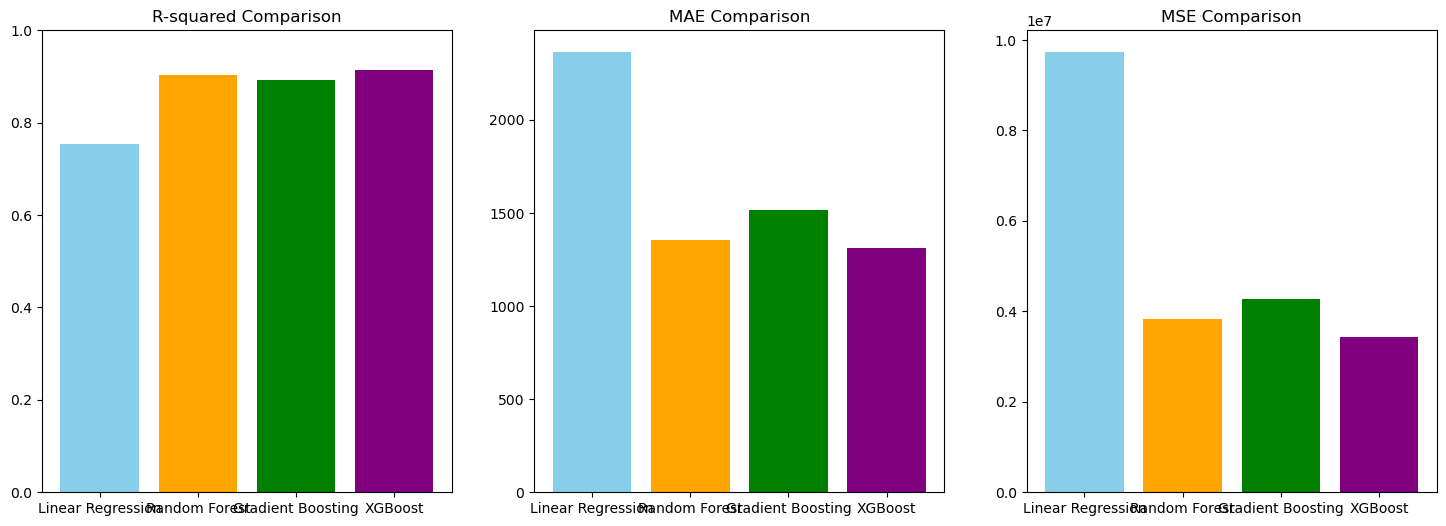

Linear Regression: MAE=2362.7720599337363, MSE=9728127.835685726, R2=0.7548463650161585
Random Forest: MAE=1354.6074802151606, MSE=3825640.4705858906, R2=0.9035919671958839
Gradient Boosting: MAE=1518.01140714049, MSE=4280099.695557902, R2=0.8921393698579733
XGBoost: MAE=1313.2721054868907, MSE=3435165.513459125, R2=0.9134321212768555
   Actual Price  LR Predicted  RF Predicted  GB Predicted  XG Predicted
0         24000      19534.94      24060.66      24328.71      24208.58
1          6500      11054.50       6451.08       6944.97       6397.59
2         12000      12288.91      12860.22      12573.79      11599.12
3          4900       7183.75       5716.50       5700.06       5336.55
4          7995       9577.54       5308.11       5935.95       6106.60
5          5900       8250.73       6076.33       5645.17       6006.44
6          2200       1143.09       2208.19       1833.43       1989.37
7         10900      14021.79      11457.79      12866.96      12268.75
8         25000

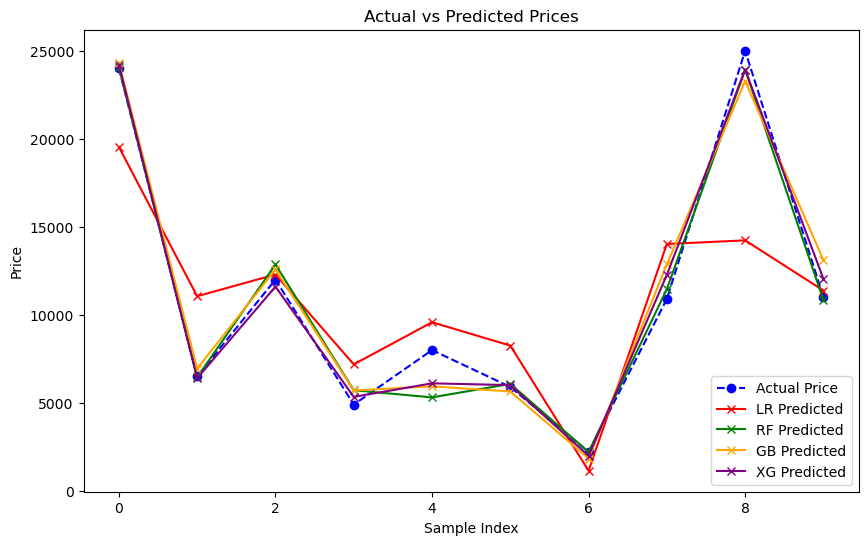

In [64]:
#Final Model Comparison
target = 'price'   
features = car_final_model_data.drop(columns=[target])  # All columns except the target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, car_final_model_data[target], test_size=0.2, random_state=42)

# Optionally, scale the features (important for some algorithms but not for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Linear Regression ---
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# --- Random Forest (best model from RandomizedSearchCV) ---
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# --- Gradient Boosting ---
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# --- XGBoost ---
# Initialize XGBoost Regressor
xg_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
xg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xg = xg_model.predict(X_test_scaled)

# Evaluate the model
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

# --- Final Model Comparison ---
# Collect results for comparison
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
r2_scores = [r2_lr, r2_rf, r2_gb, r2_xg]
mae_scores = [mae_lr, mae_rf, mae_gb, mae_xg]
mse_scores = [mse_lr, mse_rf, mse_gb, mse_xg]

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# R-squared plot
ax[0].bar(models, r2_scores, color=['skyblue', 'orange', 'green', 'purple'])
ax[0].set_title("R-squared Comparison")
ax[0].set_ylim([0, 1])

# MAE plot
ax[1].bar(models, mae_scores, color=['skyblue', 'orange', 'green', 'purple'])
ax[1].set_title("MAE Comparison")

# MSE plot
ax[2].bar(models, mse_scores, color=['skyblue', 'orange', 'green', 'purple'])
ax[2].set_title("MSE Comparison")

plt.show()

# Print detailed evaluation
print(f"Linear Regression: MAE={mae_lr}, MSE={mse_lr}, R2={r2_lr}")
print(f"Random Forest: MAE={mae_rf}, MSE={mse_rf}, R2={r2_rf}")
print(f"Gradient Boosting: MAE={mae_gb}, MSE={mse_gb}, R2={r2_gb}")
print(f"XGBoost: MAE={mae_xg}, MSE={mse_xg}, R2={r2_xg}")

# --- Actual vs Predicted Comparison for Few Records ---
# Select a few records for demonstration (e.g., first 10 records)
sample_data = X_test.iloc[:10]

# Get actual prices
actual_prices = y_test.iloc[:10].values

# Make predictions using all models
pred_lr = lr_model.predict(X_test_scaled[:10])
pred_rf = rf_model.predict(X_test_scaled[:10])
pred_gb = gb_model.predict(X_test_scaled[:10])
pred_xg = xg_model.predict(X_test_scaled[:10])

# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual Price': actual_prices,
    'LR Predicted': pred_lr,
    'RF Predicted': pred_rf,
    'GB Predicted': pred_gb,
    'XG Predicted': pred_xg
})

# Display the comparison table
print(comparison_df)

# Optionally, plot Actual vs Predicted Prices for visual comparison
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price", marker='o', linestyle='--', color='b')
plt.plot(pred_lr, label="LR Predicted", marker='x', linestyle='-', color='r')
plt.plot(pred_rf, label="RF Predicted", marker='x', linestyle='-', color='g')
plt.plot(pred_gb, label="GB Predicted", marker='x', linestyle='-', color='orange')
plt.plot(pred_xg, label="XG Predicted", marker='x', linestyle='-', color='purple')

plt.title("Actual vs Predicted Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()


# Conclusion and Key Observations

## Model Performance Summary
Here is a detailed summary of the evaluation metrics (MAE, MSE, and R²) for each model based on the results:

| **Model**            | **MAE (Mean Absolute Error)** | **MSE (Mean Squared Error)** | **R-squared (R²)** |
|----------------------|-------------------------------|------------------------------|--------------------|
| **Linear Regression** | 2362.77                       | 9,728,127.84                 | 0.7548             |
| **Random Forest**     | 1354.61                       | 3,825,640.47                 | 0.9036             |
| **Gradient Boosting** | 1518.01                       | 4,280,099.70                 | 0.8921             |
| **XGBoost**           | 1313.27                       | 3,435,165.51                 | 0.9134             |

---

## Key Observations

### **Linear Regression**:
- **MAE (2362.77)** and **MSE (9,728,127.84)** are relatively high, indicating that Linear Regression does not perform well for this problem. The model's predictions are farther from the actual values, which suggests it may not capture the complex relationships present in the dataset.
- The **R-squared (0.7548)** indicates that the model explains about 75% of the variance in vehicle prices, leaving a significant portion unexplained. This shows that while the model provides a rough approximation, it lacks accuracy in predicting vehicle prices with complex non-linear relationships.

### **Random Forest**:
- **MAE (1354.61)** and **MSE (3,825,640.47)** are much lower than Linear Regression, suggesting better prediction accuracy.
- **R-squared (0.9036)** is very high, indicating that Random Forest captures more of the underlying patterns in the data and explains over 90% of the variance in vehicle prices. This model is more capable of handling non-linearities and feature interactions.

### **Gradient Boosting**:
- **MAE (1518.01)** and **MSE (4,280,099.70)** are slightly worse than Random Forest but still significantly better than Linear Regression.
- **R-squared (0.8921)** shows that Gradient Boosting performs well, explaining approximately 89% of the variance in the data. While it performs similarly to Random Forest, it is slightly less accurate in this specific case.

### **XGBoost**:
- **MAE (1313.27)** and **MSE (3,435,165.51)** are the lowest among all models, making XGBoost the most accurate model for vehicle price prediction.
- **R-squared (0.9134)** is the highest, meaning XGBoost explains over 91% of the variance in vehicle prices. This is the best performance among the models, and it indicates that XGBoost is particularly adept at capturing the complex patterns in the data.

---

## Key Insights:
- **XGBoost** is the most accurate model in terms of prediction accuracy (lowest **MAE** and **MSE**) and also explains the highest proportion of variance in vehicle prices (highest **R-squared**). This makes XGBoost the top-performing model.
- **Random Forest** is a very close second, with excellent performance, though it slightly lags behind XGBoost in **R-squared** and **MAE**.
- **Gradient Boosting** offers good performance but falls behind Random Forest in terms of both **MAE** and **MSE**.
- **Linear Regression** lags significantly behind the tree-based models. While it provides decent results, it fails to capture the complex relationships and non-linearities in the data, making it unsuitable for a high-accuracy pricing strategy.

---

## Recommendations for the Used Car Dealership:

### 1. **Primary Recommendation: Use XGBoost for Price Prediction**
   - **Reason**: XGBoost provides the best performance with the lowest **MAE (1313.27)**, **MSE (3,435,165.51)**, and the highest **R-squared (0.9134)**. This model is capable of making highly accurate predictions and will help the dealership price vehicles more effectively.
   - **Actionable Insight**: By using XGBoost, the dealership can set more accurate prices, leading to potentially better profit margins, more competitive pricing, and improved customer satisfaction. XGBoost captures non-linear relationships, interactions, and outliers better than simpler models like Linear Regression.

### 2. **Alternative Recommendation: Random Forest**
   - **Reason**: Random Forest also performs well with an **MAE of 1354.61** and **R-squared of 0.9036**, and it is a simpler alternative to XGBoost. It is robust and doesn't require as much parameter tuning.
   - **Actionable Insight**: Random Forest can be a good choice if the dealership prefers a simpler model that still offers strong performance. It can serve as a solid alternative to XGBoost, especially if interpretability and ease of use are important.

### 3. **Consider Gradient Boosting for a Balanced Approach**
   - **Reason**: Gradient Boosting provides competitive results with **R-squared = 0.8921**, but slightly underperforms compared to Random Forest and XGBoost. It strikes a balance between model performance and complexity.
   - **Actionable Insight**: Gradient Boosting can be used if the dealership needs a model that balances performance and interpretability, but it’s not quite as strong as XGBoost or Random Forest in this case.

### 4. **Linear Regression as a Baseline**
   - **Reason**: While Linear Regression is useful for quick approximations, it falls short of the more complex models in terms of accuracy. It should be used as a baseline for simple tasks or when model interpretability is prioritized.
   - **Actionable Insight**: For more sophisticated pricing strategies and competitive pricing, the dealership should move beyond Linear Regression to more robust models like XGBoost or Random Forest.

---

## Actionable Insights for Vehicle Pricing Strategy:

### Factors That Influence Car Prices
Based on the analysis, here are some key insights regarding what factors are likely influencing the price of a used car:

1. **Vehicle Age**: Older cars typically have lower prices, but exceptions might be found in classic or rare cars.
2. **Mileage**: Cars with lower mileage tend to have higher prices as they are expected to have a longer lifespan.
3. **Brand and Model**: Certain brands and models hold their value better than others due to reputation, reliability, and demand.
4. **Vehicle Condition**: Cars in better condition (well-maintained, fewer accidents) generally command higher prices.
5. **Fuel Type and Engine Size**: Fuel-efficient cars or cars with larger engines (especially in high-demand models) may impact price trends.
6. **Market Trends**: Economic conditions, seasonal trends, and supply and demand play a role in determining used car prices.

### 1. **Dynamic Pricing**
   - **Action**: The dealership can integrate the **XGBoost** model into their pricing system to adjust prices dynamically based on real-time vehicle attributes (such as mileage, age, brand, and condition). This will allow the dealership to stay competitive in the market, adjusting prices as new inventory comes in and market conditions shift.

### 2. **Real-Time Pricing**
   - **Action**: The dealership can build a tool for sales representatives or even customers to input vehicle details and receive an instant, data-driven price recommendation. This will enhance customer trust and lead to more efficient sales.

### 3. **Continuous Monitoring and Retraining**
   - **Action**: As more data becomes available (e.g., vehicle sales, market trends), retrain the model periodically to ensure it adapts to new patterns and stays accurate.

### 4. **Feature Engineering**
   - **Action**: Ensure that all relevant features (e.g., vehicle condition, service history, accident history) are included and optimized for better prediction accuracy. Consider adding interaction terms or non-linear transformations of features to further improve performance.

---

## Final Thoughts:
- **XGBoost** is the optimal choice for vehicle price prediction, offering the most accurate predictions with minimal error.
- **Random Forest** is a strong alternative with similar performance but simpler implementation.
- **Gradient Boosting** is a solid contender but performs slightly worse than the other two tree-based models.
- **Linear Regression** should only be used for simpler or baseline cases, as it doesn’t capture the complexity in the data as effectively as tree-based models.

By adopting XGBoost (or Random Forest), the dealership can improve its pricing strategy, optimize profit margins, and better meet customer expectations.


# Key Insights and Recommendations for the Used Car Dealership

## Key Columns in the Dataset:
- **Price**
- **Manufacturer**
- **Condition**
- **Cylinders**
- **Fuel**
- **Odometer**
- **Title Status**
- **Transmission**
- **Type**
- **Car Age**

---

## 1. Manufacturer
- **Insight**: Popular brands like **Toyota**, **Honda**, and **BMW** generally hold higher resale value.
- **Recommendation**: Price **reputable brands** higher and market them as desirable. Use the model to adjust prices for less popular brands.

## 2. Condition
- **Insight**: **Excellent** and **Good** condition cars are priced higher than **Fair** or **Poor** condition.
- **Recommendation**: Develop a condition grading system (**Excellent**, **Good**, **Fair**, **Poor**) and price accordingly. Emphasize condition in marketing.

## 3. Cylinders
- **Insight**: More cylinders generally indicate more power, but lower fuel efficiency. Smaller engines (e.g., 4 cylinders) tend to be more fuel-efficient.
- **Recommendation**: Price **fuel-efficient, 4-cylinder cars** competitively, and **larger engines** higher for performance or luxury.

## 4. Fuel Type
- **Insight**: **Electric** and **Hybrid** vehicles often hold higher prices due to their fuel efficiency and lower maintenance.
- **Recommendation**: Price **electric and hybrid vehicles** higher, considering market trends and available incentives. Track demand for **fuel-efficient** cars.

## 5. Odometer (Mileage)
- **Insight**: Cars with **lower mileage** generally command higher prices.
- **Recommendation**: **Low-mileage** cars should be priced at a premium. **High-mileage** cars need lower pricing or additional incentives like warranties.

## 6. Title Status
- **Insight**: **Clean title** vehicles are priced higher than **salvage** or **rebuilt title** cars.
- **Recommendation**: Price **clean title** vehicles higher. Salvage vehicles should be priced lower but be transparent about their history.

## 7. Transmission Type
- **Insight**: **Automatic transmissions** are more popular and tend to fetch higher prices, especially in markets where manual cars are less common.
- **Recommendation**: **Price automatic transmission cars** higher, but highlight **manual transmission cars** for driving enthusiasts.

## 8. Type (Car Type/Body Style)
- **Insight**: **SUVs**, **trucks**, and **luxury vehicles** tend to be priced higher due to demand and utility.
- **Recommendation**: **SUVs** and **trucks** should be priced at a premium. Adjust pricing for **sedans** and **compact cars** to stay competitive.

## 9. Car Age
- **Insight**: Newer cars generally cost more, but **older cars** in **good condition** can also fetch decent prices.
- **Recommendation**: Price **newer cars** higher. For **older cars**, ensure they are in excellent condition and offer them at competitive prices.

---

## Summary Recommendations:
1. **Price by Condition**: Develop a clear **condition grading system** and use it to price cars accordingly.
2. **Emphasize Popular Brands**: Price **Toyota**, **Honda**, and similar brands at a premium.
3. **Fuel Efficiency**: Offer higher prices for **hybrids** and **electric cars**.
4. **Odometer Considerations**: **Low-mileage cars** should be priced higher.
5. **Title Status Transparency**: Be clear about **title status** and adjust prices.
6. **Transmission Type**: **Automatic transmission** cars typically sell at higher prices.
7. **Type & Demand**: Price **SUVs** and **trucks** higher; adjust pricing for **sedans**.
8. **Car Age**: Consider **car age** when setting prices, offering competitive pricing for older cars in good condition.

## Actionable Insight:
Use **XGBoost** to dynamically adjust prices based on these factors, ensuring **competitive pricing** and better alignment with market demands.
